In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [2]:
csv = 'archivo_ordenado.csv'
df = pd.read_csv(csv)

In [3]:
# Ver las primeras filas del DataFrame
df.head()

,Unnamed: 0,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,nombre_estacion_Retiro,calle_prin_Retiro,calle_secu_Retiro,colonia_Retiro,alcaldia_Retiro,...,nombre_estacion_Arribo,calle_prin_Arribo,calle_secu_Arribo,colonia_Arribo,alcaldia_Arribo,latitud_Arribo,longitud_Arribo,sitio_de_e_Arribo,Fecha_Arribo,Hora_Arribo
0,0,M,26.0,5180930,568,Doctor Barragán_Doctor Erazo,Doctor Barragán,Doctor Erazo,Doctores,Cuauhtemoc,...,Manuel J. Othón_José T. Cuellar,Manuel J. Othón,José T. Cuellar,Obrera,Cuauhtemoc,19.414595,-99.135886,Arroyo,01/01/2025,00:00:03
1,1,F,54.0,3653953,283,Av. Coyoacán_Rafael Dondé,Av. Coyoacán,Rafael Dondé,Del Valle Norte,Benito Juarez,...,Cumbres De Maltrata_Uxmal,Cumbres De Maltrata,Uxmal,Narvarte,Benito Juarez,19.395205,-99.155049,Arroyo,01/01/2025,00:00:41
2,2,M,38.0,7511322,34,Liverpool_Génova,Liverpool,Génova,Juarez,Cuauhtemoc,...,Sonora_Ámsterdam,Sonora,Ámsterdam,Hipodromo,Cuauhtemoc,19.412982,-99.166936,Arroyo,01/01/2025,00:00:59
3,3,M,41.0,3804572,258,Circuito Interior_Juan Escutia,Circuito Interior,Juan Escutia,Condesa,Cuauhtemoc,...,Reforma_Praga,Reforma,Praga,Juarez,Cuauhtemoc,19.425280,-99.171099,Banqueta,01/01/2025,00:01:08
4,4,M,35.0,3848405,43,Revillagigedo_Juárez,Revillagigedo,Juárez,Centro,Cuauhtemoc,...,Jalapa_Puebla,Jalapa,Puebla,Roma Norte,Cuauhtemoc,19.422288,-99.162138,Arroyo,01/01/2025,00:01:17


In [4]:
# Convertir columnas de fecha y hora a cadenas
df['Fecha_Retiro'] = df['Fecha_Retiro'].astype(str)
df['Hora_Retiro'] = df['Hora_Retiro'].astype(str)
df['Fecha_Arribo'] = df['Fecha_Arribo'].astype(str)
df['Hora_Arribo'] = df['Hora_Arribo'].astype(str)

# Combinar las columnas de fecha y hora en formato de cadena
df['Fecha_Retiro_Sin_Tiempo'] = df['Fecha_Retiro'] + ' ' + df['Hora_Retiro']
df['Fecha_Arribo_Sin_Tiempo'] = df['Fecha_Arribo'] + ' ' + df['Hora_Arribo']

# Ahora, convertir a datetime usando un formato específico y añadir dayfirst=True
df['Fecha_Retiro'] = pd.to_datetime(df['Fecha_Retiro_Sin_Tiempo'], dayfirst=True, errors='coerce')
df['Fecha_Arribo'] = pd.to_datetime(df['Fecha_Arribo_Sin_Tiempo'], dayfirst=True, errors='coerce')

In [5]:
# Agregar una columna que indica si la bicicleta fue utilizada de noche
df['Uso_Noche'] = df['Fecha_Retiro'].dt.hour.apply(lambda x: 1 if x >= 20 or x < 6 else 0)  # 1 si es de noche, 0 si no

In [6]:
df = df[['Genero_Usuario', 'Edad_Usuario', 'Uso_Noche']].dropna()

In [7]:

# One-hot encoding del género
encoder = OneHotEncoder(drop='first')  
genero_encoded = encoder.fit_transform(df[['Genero_Usuario']]).toarray()  # Convertir a array denso

In [8]:
# Crear un DataFrame con las columnas generadas por OneHotEncoder
df_encoded = pd.DataFrame(genero_encoded, columns=encoder.get_feature_names_out(['Genero_Usuario']))

In [9]:
# Combinar datos
df_final = pd.concat([df[['Edad_Usuario', 'Uso_Noche']], df_encoded], axis=1)

In [10]:
# Dividir los datos en características y etiqueta
X = df_final.drop('Uso_Noche', axis=1)  # Características
y = df_final['Uso_Noche']                # Etiqueta

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Entrenar el modelo de Gradient Boosting
modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [13]:
# Predecir usando el conjunto de prueba
y_pred = modelo_gb.predict(X_test)

In [14]:
# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[3896369       0]
 [ 611509       0]]

Informe de Clasificación:


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93   3896369
           1       0.00      0.00      0.00    611509

    accuracy                           0.86   4507878
   macro avg       0.43      0.50      0.46   4507878
weighted avg       0.75      0.86      0.80   4507878



/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


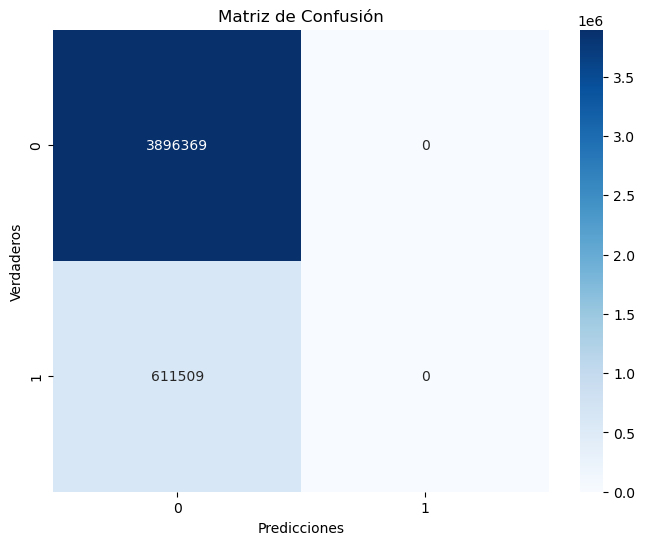

In [15]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.show()